In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as n
import datetime

csv_path = "Resources/Rodent_Data.csv"
ward_data_file = "Resources/ward_data_file.csv"

rodent_bait_df = pd.read_csv(csv_path)
ward_data_df = pd.read_csv(ward_data_file)

rodent_bait_df.head()

/Users/keithgreenwalt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Number of Premises Baited,Number of Premises with Garbage,Number of Premises with Rats,Current Activity,Most Recent Action,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,01/01/2011,Completed,01/05/2011,11-00000992,Rodent Baiting/Rat Complaint,2,1,2,Dispatch Crew,Inspected and baited,437 W ROOT ST,60609.0,1.174071e+06,1.877418e+06,3.0,9.0,37.0,41.819041,-87.636954,"(41.81904110375691, -87.63695396416237)"
1,01/01/2011,Completed,01/05/2011,11-00001321,Rodent Baiting/Rat Complaint,0,0,0,Dispatch Crew,"Area inspected, no cause and no baiting",5545 W MADISON ST,60644.0,1.139306e+06,1.899470e+06,29.0,15.0,25.0,41.880258,-87.763950,"(41.88025817420532, -87.7639495188141)"
2,01/01/2011,Completed,01/05/2011,11-00001629,Rodent Baiting/Rat Complaint,0,0,0,Dispatch Crew,"Area inspected, no cause and no baiting",2540 W ESTES AVE,60645.0,1.158079e+06,1.947026e+06,50.0,24.0,2.0,42.010392,-87.693713,"(42.01039236610359, -87.69371292873835)"
3,01/01/2011,Completed,01/05/2011,11-00002551,Rodent Baiting/Rat Complaint,3,6,3,Dispatch Crew,Inspected and baited,7039 S NORMAL BLVD,60621.0,1.174168e+06,1.858241e+06,6.0,7.0,68.0,41.766415,-87.637166,"(41.76641494684121, -87.63716556232575)"
4,01/01/2011,Completed,01/05/2011,11-00002697,Rodent Baiting/Rat Complaint,1,3,1,Dispatch Crew,Inspected and baited,1111 E 93RD ST,60619.0,1.185292e+06,1.843540e+06,8.0,4.0,47.0,41.725819,-87.596855,"(41.72581895961811, -87.59685549830274)"


In [2]:
# Display ward data
ward_data_df.head()

,Ward,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,1,Moreno,55705,108482,0.547,0.050,0.040,0.337
1,2,Hopkins,55855,130287,0.731,0.076,0.070,0.099
2,3,Dowell,51207,33968,0.212,0.616,0.104,0.045
3,4,King,53079,93453,0.221,0.610,0.096,0.044
4,5,Hairston,45853,65738,0.225,0.640,0.067,0.040


In [3]:
# Convert date to datetime
rodent_bait_df['Creation Date'] = pd.to_datetime(rodent_bait_df['Creation Date'])
rodent_bait_df['Completion Date'] = pd.to_datetime(rodent_bait_df['Completion Date'])

rodent_bait_df.dtypes

Creation Date                      datetime64[ns]
Status                                     object
Completion Date                    datetime64[ns]
Service Request Number                     object
Type of Service Request                    object
Number of Premises Baited                  object
Number of Premises with Garbage            object
Number of Premises with Rats               object
Current Activity                           object
Most Recent Action                         object
Street Address                             object
ZIP Code                                  float64
X Coordinate                              float64
Y Coordinate                              float64
Ward                                      float64
Police District                           float64
Community Area                            float64
Latitude                                  float64
Longitude                                 float64
Location                                   object


In [4]:
# Create a dataframe from select columns
rodent_clean = rodent_bait_df[['Creation Date', 'Completion Date','Status', 
       'Type of Service Request','Current Activity', 'Most Recent Action','Ward'
       ]]

#rodent_clean["Ward"] = rodent_clean["Ward"].map('{:.0f}'.format)

# Remove NA rows in Ward
rodent_clean.dropna(subset = ["Ward"], inplace=True)

# Remove "0" ward rows
rodent_clean = rodent_clean[rodent_clean["Ward"] > 0]

# Filter out requests created before 01/01/2011
rodent_clean = rodent_clean[rodent_clean["Creation Date"] >= "2011-01-01"]
rodent_clean.head()

/Users/keithgreenwalt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Creation Date,Completion Date,Status,Type of Service Request,Current Activity,Most Recent Action,Ward
0,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,3.0
1,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,"Area inspected, no cause and no baiting",29.0
2,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,"Area inspected, no cause and no baiting",50.0
3,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,6.0
4,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,8.0


In [5]:
# Filter out open service requests
rodent_completed = rodent_clean[rodent_clean["Status"] =="Completed"]

rodent_completed["Ward"] = rodent_completed["Ward"].astype('int64')

rodent_completed.head()

/Users/keithgreenwalt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Creation Date,Completion Date,Status,Type of Service Request,Current Activity,Most Recent Action,Ward
0,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,3
1,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,"Area inspected, no cause and no baiting",29
2,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,"Area inspected, no cause and no baiting",50
3,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,6
4,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,8


In [6]:
# Add a column calculating days to complete
rodent_completed['Days to Complete'] = (rodent_completed['Completion Date'] - rodent_completed['Creation Date']).dt.days

# View dataframe
rodent_completed.head()

/Users/keithgreenwalt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Creation Date,Completion Date,Status,Type of Service Request,Current Activity,Most Recent Action,Ward,Days to Complete
0,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,3,4
1,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,"Area inspected, no cause and no baiting",29,4
2,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,"Area inspected, no cause and no baiting",50,4
3,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,6,4
4,2011-01-01,2011-01-05,Completed,Rodent Baiting/Rat Complaint,Dispatch Crew,Inspected and baited,8,4


In [7]:
# Explore days to complete data
rodent_completed["Days to Complete"].describe()

count    298095.000000
mean         11.938214
std          15.086321
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1552.000000
Name: Days to Complete, dtype: float64

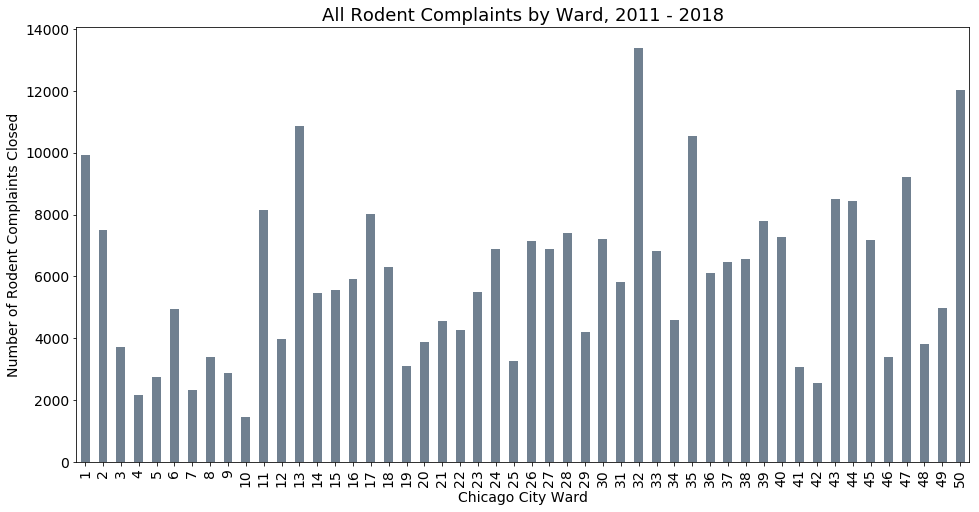

<Figure size 432x288 with 0 Axes>

In [8]:
# Using GroupBy in order to separate the data into fields according to ward
completed_group = rodent_completed.groupby("Ward")

# Count the number of requests per ward
ward_counts = completed_group["Ward"].count()

# Plot in a bar chart
ward_chart = ward_counts.plot(kind= 'bar', facecolor = 'slategrey', figsize = (16,8), fontsize=14)

# Set the xlabel and ylable using class methods
ward_chart.set_title("All Rodent Complaints by Ward, 2011 - 2018", fontsize=18)
ward_chart.set_xlabel("Chicago City Ward", fontsize=14)
ward_chart.set_ylabel("Number of Rodent Complaints Closed", fontsize=14)

plt.savefig("rodents_requests.png")

plt.show()
plt.tight_layout()

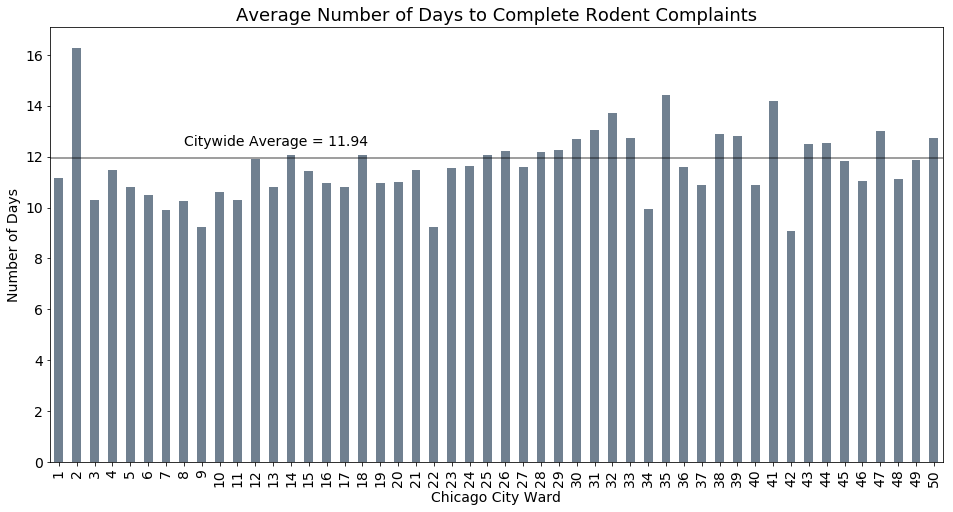

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot the average time to close a request by ward using nonzero group

# Calculate the average time it took to close requests across wards
avg_days_city = round(rodent_completed["Days to Complete"].mean(), 2)

# Calculate the average time it took to close requests by ward
avg_days_ward = round(completed_group["Days to Complete"].mean(),2)

# Plot in a bar chart
avg_days_chart = avg_days_ward.plot(kind='bar', facecolor='slategrey', figsize = (16,8), fontsize=14)

# Labels and other formatting
avg_days_chart.set_title("Average Number of Days to Complete Rodent Complaints", fontsize=18)
avg_days_chart.set_xlabel("Chicago City Ward", fontsize=14)
avg_days_chart.set_ylabel("Number of Days", fontsize=14)
plt.axhline(avg_days_city, color = 'black', alpha = 0.5, label = 'Citywide Average')
plt.text(7,(avg_days_city + .5), f'Citywide Average = {avg_days_city}', fontsize=14)

plt.savefig("rodents_avg_days.png")

plt.show()
plt.tight_layout()

In [10]:
ward_summary = pd.DataFrame({"Number of Service Requests": ward_counts,
                                    "Average Days to Complete": avg_days_ward})
ward_summary.head()

,Number of Service Requests,Average Days to Complete
Ward,,
1,9918,11.18
2,7501,16.28
3,3712,10.28
4,2154,11.48
5,2737,10.79


In [ ]:
# Merge ward summary table with ward data
ward_merge = pd.merge(ward_summary, ward_data_df, on="Ward")
ward_merge_sorted = ward_merge.sort_values("Average Days to Complete", ascending=False)
ward_merge_sorted.reset_index(drop=True)

In [ ]:
# Create a scatterplot showing average days to complete v. average household income
x_axis = ward_merge["Average Days to Complete"]
y_axis = ward_merge["Mean Household Income"] / 1000
size = ward_merge["Number of Service Requests"] / 5
color = ward_merge["Number of Service Requests"]

# plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_axis, s=size, marker="o", c=color, cmap="Oranges", edgecolors="grey", alpha=0.6)

# Format chart
plt.title("Rodent Complaints by Ward: Average Days to Complete v. Average Household Income", fontsize=18)
plt.xlabel("Average Days to Complete", fontsize=14)
plt.ylabel("Average Household Income ($000)", fontsize=14)
plt.axvline(avg_days_city, color = 'black', alpha = 0.5)
plt.text((avg_days_city +.1), 150, f'Citywide Average = {avg_days_city}', rotation=90, fontsize=14)
plt.text(13, 35, "*Size/color indicates number of requests per ward.", fontsize=14)
#plt.xlim([50, 100])
#plt.ylim([50, 100])
plt.gcf().set_size_inches(16, 10)
#plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("rodents_income.png")

plt.show()
plt.tight_layout()